# A/B-Testing: Vergleich einer Marketing-Kampagnenperformance von Instagram-Ads und AdWords
von Steffen Riske

## Business Problem/Aufgabenstellung
Als fiktive Marketingagentur ist es unser vorrangiges Ziel, den Return on Investment (ROI) für die Werbekampagnen unserer Kunden zu maximieren. Es wurden zwei Werbekampagnen durchgeführt, eine auf Instagram und die andere auf AdWords, und unsere Aufgabe ist es zu ermitteln, welche Plattform die besseren Ergebnisse in Bezug auf Klicks, Conversions und die generelle Kosteneffizienz erzielt. Indem wir die effektivste Plattform identifizieren, können wir Ressourcen effizienter zuweisen und Werbestrategien optimieren, um bessere Ergebnisse für unsere Kunden zu liefern.

Die Hauptaufgabe besteht darin, mittels A/B-Testing (Split-Testing) festzustellen, welche der beiden Werbekanäle – Instagram Ads (Social Media) oder Google Adwords (Suchmaschinen-Marketing) – bei vergleichbarer Zielgruppe und Budgetallokation eine statistisch signifikant bessere Performance erzielt.

#### Leitende Forschungsfrage: Welche Plattform für bezahlte Ads ist effektiver in Bezug auf Conversions, Klicks und die generelle Kosteneffizienz?



## Übersicht:
1. Import der Bibliotheken
2. Beschreibung des Datensatzes
3. Vergleich der Kampagnenperformance
4. Hypothesen-Test
5. Regressionsanalyse
6. Analysieren der Instagram Kampagnenwerte über einen längeren Zeitraum 

## 1. Import der Bibliotheken

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## 2. Beschreibung des Datensatzes

Der Datensatz umfasst Daten, die auf Basis von Kundendaten anonymisiert, randomisiert und augmentiert wurden, so dass ein Zeitraum von 365 Tagen erreicht wird, die Verhältnisse realitätsnah sind, aber das Szenario völlig fiktiv. Die Daten stellen damit die Performance von zwei separaten (fiktiven) Werbekampagnen da, die im gesamten Jahr 2024 durchgeführt wurden. Konkret beinhaltet der Datensatz eine Instagram-Ad-Kampagne und eine AdWords-Ad-Kampagne. 

**Anmerkung:** Die Augmentierung und Randomisierung macht eine Datenbereinigung an dieser Stelle obsolet, da alle Werte komplett und korrekt aufgefüllt wurden. Dieses Projekt konzentriert sich auf die Durchführung statistischer Verfahren.

Für jeden Tag des Jahres 2024 gibt es eine entsprechende Zeile im Datensatz, was zu insgesamt 365 Zeilen an Kampagnendaten führt, die analysiert werden sollen. Der Datensatz enthält verschiedene Performance-Metriken für jede Werbekampagne, die Einblicke in ihre Effektivität und Effizienz im Zeitverlauf bieten.

Die wichtigsten im Datensatz enthaltenen Features sind:

- Datum (Date): Das Datum, das jedem Eintrag der Kampagnendaten entspricht, vom 1. Januar 2024 bis zum 31. Dezember 2024.
- Anzeigenansichten (Ad Views): Die Anzahl der Male, wie oft die Anzeige angesehen wurde.
- Anzeigenklicks (Ad Clicks): Die Anzahl der Klicks, die auf die Anzeige entfallen sind.
- Anzeigenkonversionen (Ad Conversions): Die Anzahl der Konversionen, die aus der Anzeige resultierten.
- Kosten pro Anzeige (Cost per Ad): Die Kosten, die mit der Durchführung der Instagram-Ad-Kampagne verbunden sind.
- Klickrate (Click-Through Rate, CTR): Das Verhältnis von Klicks zu Views, das die Effektivität bei der Generierung von Klicks angibt.
- Konversionsrate (Conversion Rate): Das Verhältnis von Konversionen zu Klicks, das die Effektivität gewünschter Aktionen widerspiegelt.
- Kosten pro Klick (Cost per Click, CPC): Die durchschnittlichen Kosten, die pro Klick auf eine Anzeige anfallen.

**Learning**: Bei der Benennung der Spaltennamen habe ich die Lesbarkeit über die Funktionalität gestellt, hier musste ich mehr als einmal im Code nachbessern, da z.B. Leerzeichen gefehlt haben.

In [384]:
df = pd.read_csv('portfolio_marketing_campaign.csv', encoding='windows-1252')

In [385]:
# Überblick über den Dataframe
df.head()

,Date,Instagram Ad Campaign,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversions,Cost per Instagram Ad,Instagram Click-Through Rate (Clicks / View),Instagram Conversion Rate (Conversions / Clicks),Instagram Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2024,IG_Jan24,2116,18,8,€ 126.00,0.83%,42.73%,€ 7.14,AW_Jan24,4984,59,5,€ 194.00,1.18%,8.40%,€ 3.30
1,1/2/2024,IG_Jan24,3106,36,12,€ 104.00,1.15%,34.04%,€ 2.91,AW_Jan24,4022,71,6,€ 75.00,1.77%,7.80%,€ 1.05
2,1/3/2024,IG_Jan24,3105,26,8,€ 102.00,0.84%,31.45%,€ 3.89,AW_Jan24,3863,44,4,€ 141.00,1.13%,9.59%,€ 3.23
3,1/4/2024,IG_Jan24,1107,27,9,€ 71.00,2.45%,34.76%,€ 2.62,AW_Jan24,3911,49,5,€ 141.00,1.26%,11.08%,€ 2.86
4,1/5/2024,IG_Jan24,1317,15,7,€ 78.00,1.10%,47.59%,€ 5.38,AW_Jan24,4070,55,7,€ 133.00,1.36%,12.22%,€ 2.40


In [386]:
# Anzahl der Zeilen und Spalten im Datensatz
df.shape

(365, 17)

In [387]:
# Datentypen der Spalten
df.dtypes

Date                                                object
Instagram Ad Campaign                               object
Instagram Ad Views                                   int64
Instagram Ad Clicks                                  int64
Instagram Ad Conversions                             int64
Cost per Instagram Ad                               object
Instagram Click-Through Rate (Clicks / View)        object
Instagram Conversion Rate (Conversions / Clicks)    object
Instagram Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                 object
AdWords Ad Views                                     int64
AdWords Ad Clicks                                    int64
AdWords Ad Conversions                               int64
Cost per AdWords Ad                                 object
AdWords Click-Through Rate (Clicks / View)          object
AdWords Conversion Rate (Conversions / Click)       object
AdWords Cost per Click (Ad Cost / Clicks)           obje

In [388]:
# Konvertieren der Datenspalte in ein datetime-Format
df['Date'] = pd.to_datetime(df['Date'])

In [389]:
# Erster Überblick deskriptiver Statistiken
df.describe()

,Date,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2024-07-01 00:00:00.000000256,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2024-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2024-04-01 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2024-07-01 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2024-09-30 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2024-12-30 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


## 3. Vergleich der Kampagnen-Performance

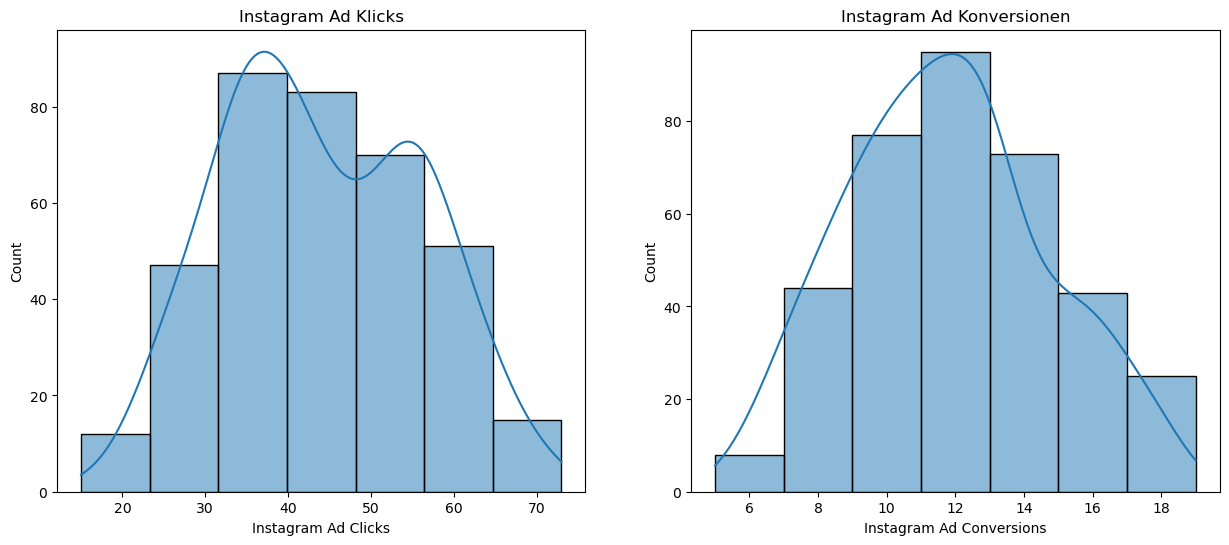

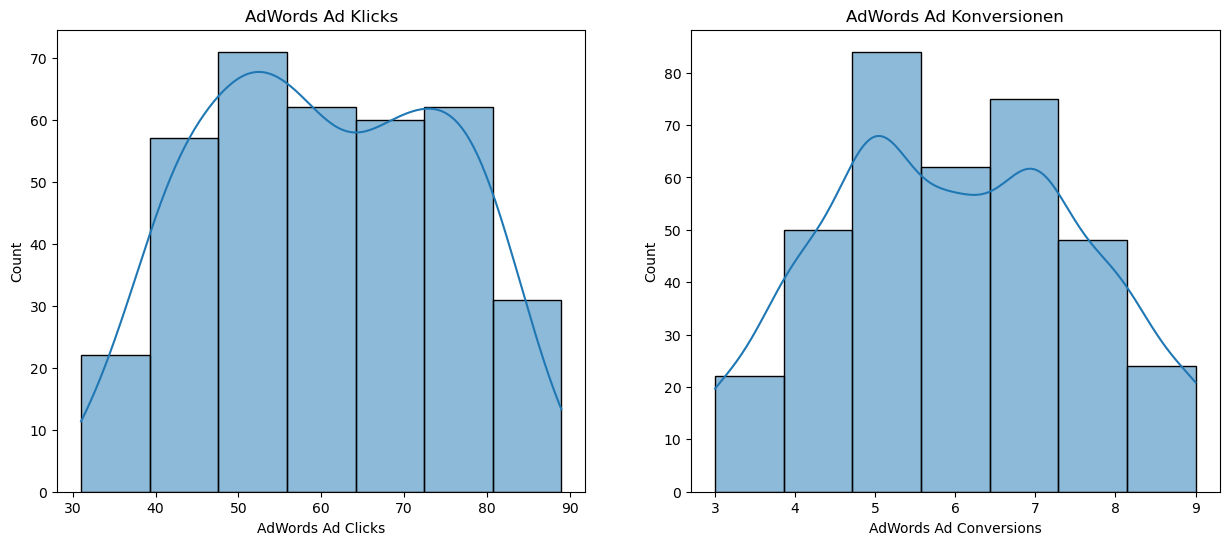

In [390]:
# Verteilung von Klicks und Konversionen
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Instagram Ad Klicks')
sns.histplot(df['Instagram Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Instagram Ad Konversionen')
sns.histplot(df['Instagram Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Klicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Konversionen')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

#### Beobachtung:
Alle Histogramme zeigen eine relativ symmetrische Form. Diese symmetrische Form deutet darauf hin, dass die Anzahl der Klicks und der Konversionen relativ gleichmäßig verteilt ist. Mit anderen Worten: Es gibt nicht viele Klicks oder Konversionen, die Ausreißer an entweder dem oberen oder dem unteren Ende darstellen.



#### Wie häufig beobachten wir Tage mit hohen Konversionszahlen im Vergleich zu Tagen mit niedrigen Konversionszahlen?

In [391]:
# Erstellen einer Funktion, die die Kategorie für die Konversionen berechnet
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('weniger als 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('mehr als 15')
    return category

# Anwenden der Funktion auf die unterschiedlichen Kampagnen Konversionen
df['Instagram Conversion Category'] = create_conversion_category('Instagram Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')



In [392]:
df[['Instagram Ad Conversions','Instagram Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()


,Instagram Ad Conversions,Instagram Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,weniger als 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,weniger als 6
3,9,6 - 10,5,weniger als 6
4,7,6 - 10,7,6 - 10


In [393]:
df['Instagram Conversion Category'].value_counts()

Instagram Conversion Category
10 - 15          189
6 - 10           128
mehr als 15       47
weniger als 6      1
Name: count, dtype: int64

In [394]:
facebook = pd.DataFrame(df['Instagram Conversion Category'].value_counts()).reset_index().rename(columns = {'Instagram Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,mehr als 15,47
3,weniger als 6,1


In [395]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10           209
weniger als 6    156
Name: count, dtype: int64

In [396]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,weniger als 6,156


In [397]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,mehr als 15,47,0.0
3,weniger als 6,1,156.0


In [398]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,weniger als 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,mehr als 15,47,0.0


In [399]:
X_axis = np.arange(len(category_df)) 
X_axis

array([0, 1, 2, 3])

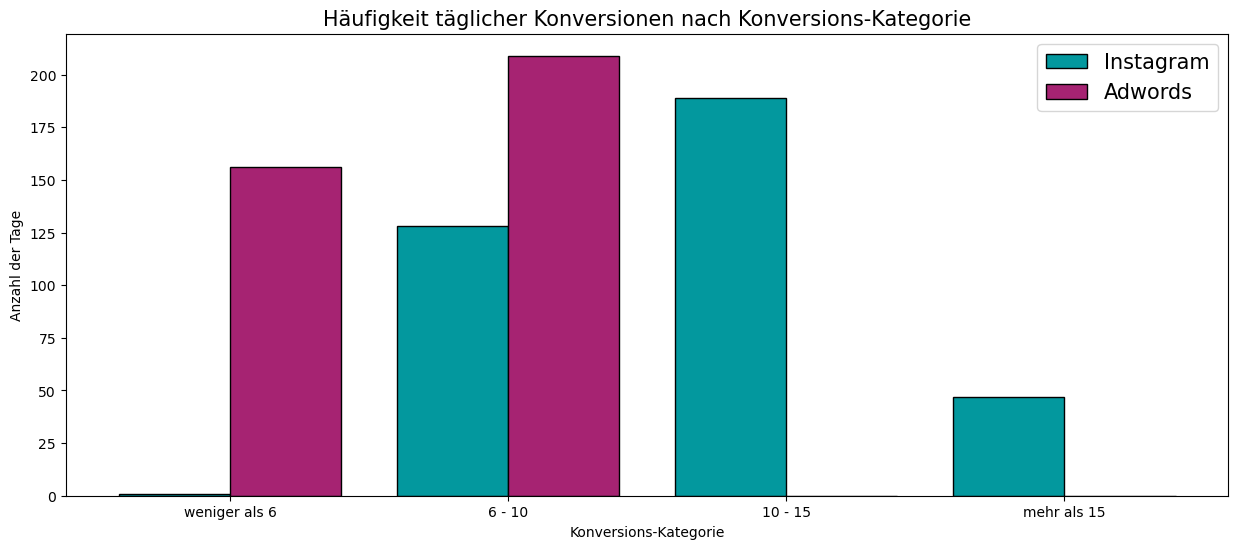

In [400]:
X_axis = np.arange(len(category_df)) 
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Instagram', color = '#03989E', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Konversions-Kategorie") 
plt.ylabel("Anzahl der Tage") 
plt.title("Häufigkeit täglicher Konversionen nach Konversions-Kategorie", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

- Die Daten deuten darauf hin, dass Instagram häufiger Tage mit höheren Konversionsraten aufwies als AdWords, welches entweder sehr niedrige Konversionsraten (weniger als 6) oder moderate (6 bis 10) hatte.
- Es besteht eine signifikante Varianz in der Anzahl der Tage mit hohen Konversionen zwischen den beiden Kampagnen.
- Das Fehlen von Tagen mit Konversionen zwischen 10 und 15 und über 15 bei AdWords deutet darauf hin, dass überprüft werden muss, welche Strategien geändert wurden oder welche externen Faktoren diese Zahlen beeinflusst haben könnten.

### Führen mehr Klicks auf einer Anzeige automatisch zu mehr Verkäufen?

### Scatterplot zur visuellen Veranschaulichung

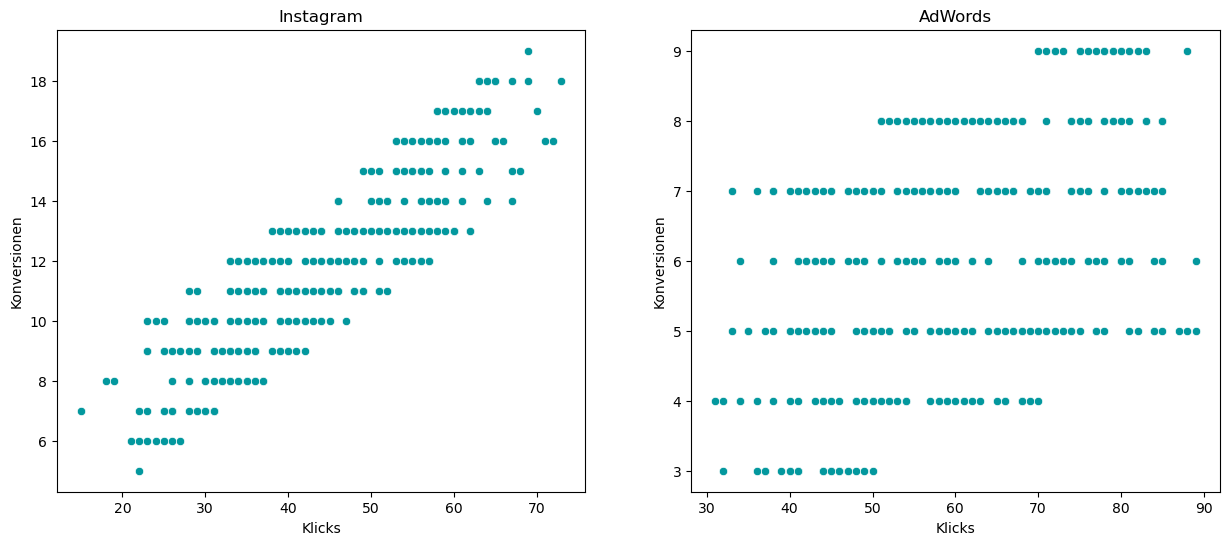

In [401]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Instagram')
sns.scatterplot(x = df['Instagram Ad Clicks'],y = df['Instagram Ad Conversions'], color = '#03989E')
plt.xlabel('Klicks')
plt.ylabel('Konversionen')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Klicks')
plt.ylabel('Konversionen')
plt.show()

### Korrelationen zwischen Klicks und Konversionen

In [402]:
facebook_corr = df[['Instagram Ad Conversions','Instagram Ad Clicks']].corr()
facebook_corr

,Instagram Ad Conversions,Instagram Ad Clicks
Instagram Ad Conversions,1.000000,0.873775
Instagram Ad Clicks,0.873775,1.000000


In [403]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [404]:
print('Korrelationskoeffizient \n--------------')
print('Instagram :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Korrelationskoeffizient 
--------------
Instagram : 0.87
AdWords :  0.45


### Beobachtungen:

- Ein Korrelationskoeffizient von 0.87 deutet auf einen starken positiven linearen Zusammenhang zwischen Klicks auf Facebook-Anzeigen und Verkäufen/Konversionen hin. Dies legt nahe, dass mit der Zunahme der Klicks auf Facebook-Anzeigen die Verkäufe tendenziell ebenfalls steigen.
- Diese starke Korrelation impliziert, dass Facebook-Anzeigen äußerst effektiv bei der Steigerung der Verkäufe sind, da ein großer Teil der Variation der Verkäufe durch die Variation der Klicks auf Facebook-Anzeigen erklärt werden kann.
- Die starke Korrelation zwischen Klicks auf Facebook-Anzeigen und Verkäufen legt nahe, dass Facebook-Werbung für das Unternehmen sehr effektiv zur Umsatzsteigerung beiträgt. Eine Erhöhung der Investitionen in Facebook-Anzeigen oder die Optimierung ihrer Leistung könnte potenziell zu noch höheren Verkäufen führen.
- Ein Korrelationskoeffizient von 0.45 deutet auf einen moderaten positiven linearen Zusammenhang zwischen Klicks auf AdWords-Anzeigen und Verkäufen hin. Obwohl immer noch eine positive Beziehung besteht, ist diese nicht so stark wie bei den Facebook-Anzeigen.
- Die moderate Korrelation zwischen Klicks auf AdWords-Anzeigen und Verkäufen weist darauf hin, dass die AdWords-Werbung zwar zum Umsatz beiträgt, ihre Wirksamkeit jedoch durch andere Faktoren beeinflusst werden könnte. Eine weitere Analyse ist erforderlich, um diese Faktoren zu identifizieren und die AdWords-Kampagnen entsprechend zu optimieren.

## 4. Hypothesen-Test

**Hypothese:** Anzeigen auf Instagram führen zu einer höheren Anzahl an Konversionen im Vergleich zu Anzeigen mit AdWords.

**Null Hypothese (H0):** Es gibt keinen Unterschied in der Anzahl an Konversionen zwischen Instagram und AdWords, die Anzahl der Konversionen von AdWords ist größer or gleich derer von Instagram.

H0: µ_Instagram ≤ µ_AdWords

**Alternative Hypothese (H1):** Die Anzahl der Konversionen auf Instagram ist höher als die mit AdWords.

H1: µ_Instagram  > µ_AdWords

In [405]:
print('Durchschnittliche Konversionen \n--------------')
print('Instagram :', round(df['Instagram Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Instagram Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT Statistik', t_stats, '\np-Wert',p_value)

if p_value < 0.05:
    print("\nP-Wert ist geringer als der Signifikanzwert, die Null-Hypothese wird abgelehnt.")
else:
    print("\nP-Wert ist größer als der Signifikanzwert, die Null-Hypothese wird angenommen.")

Durchschnittliche Konversionen 
--------------
Instagram : 11.74
AdWords : 5.98

T Statistik 32.88402060758184 
p-Wert 9.348918164530465e-134

P-Wert ist geringer als der Signifikanzwert, die Null-Hypothese wird abgelehnt.



- Der Mittelwert der Konversionen aus Instagram-Anzeigen (11.74) ist erheblich höher als der Mittelwert der Konversionen aus AdWords-Anzeigen (5.98). Dies deutet darauf hin, dass Instagram-Werbung im Durchschnitt effektiver bei der Generierung von Konversionen ist als AdWords-Werbung.

- Der T-Wert (T Statistik) (32.88) ist ein Maß für die Differenz zwischen den Mittelwerten der beiden Gruppen im Verhältnis zur Variation innerhalb der Gruppen. Ein größerer T-Wert deutet auf eine größere Differenz zwischen den Mittelwerten der beiden Gruppen hin.

- Der p-Wert (9.35e-134) ist extrem klein und liefert somit einen starken Beweis gegen die Nullhypothese (es gibt keinen Unterschied).

- Die Ergebnisse unterstützen die Alternativhypothese nachdrücklich und deuten darauf hin, dass die Anzahl der Konversionen aus Instagram-Werbung tatsächlich größer ist als die Anzahl der Konversionen aus AdWords-Werbung.

- Basierend auf den analysierten Stichprobendaten scheint Instagram-Werbung ein effektiverer Kanal zur Generierung von Konversionen zu sein als AdWords-Werbung.

- Angesichts des signifikanten Unterschieds in den Konversionsraten zwischen Instagram und AdWords sollte eine Neuzuweisung von Ressourcen zugunsten der Instagram-Werbemaßnahmen in Betracht gezogen werden. Dies könnte die Erhöhung des Werbebudgets, die Ausweitung des Targetings oder das Experimentieren mit verschiedenen Anzeigenformaten umfassen, um die Effektivität der Plattform bei der Steigerung von Konversionen zu nutzen.

## 5. Regressionsanalyse

#### Was wird passieren, wenn ich mich für die Instagram-Anzeige entscheide? Wie viele Instagram-Ad-Konversionen kann ich bei einer bestimmten Anzahl von Instagram-Ad-Klicks erwarten?

In [406]:
# Unabhängige Variable
X = df[['Instagram Ad Clicks']]

# Abhängige Variable
y = df[['Instagram Ad Conversions']]

# Erstellen und anpassen des linearen Regressionsmodells
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# Modell-Evaluierung
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Genauigkeit (R2-Wert):',round(r2,2),'%')
print('Durchschnittlicher R2-Fehler:', round(mse,2))

Genauigkeit (R2-Wert): 76.35 %
Durchschnittlicher R2-Fehler: 2.02


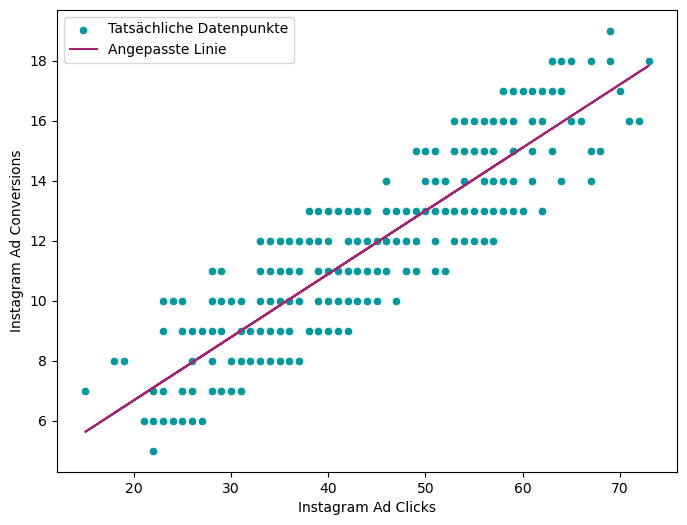

In [407]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Instagram Ad Clicks'],y = df['Instagram Ad Conversions'], color = '#03989E', label = 'Tatsächliche Datenpunkte')
plt.plot(df['Instagram Ad Clicks'], prediction, color = '#A62372', label = 'Angepasste Linie')
plt.legend()
plt.show()

In [408]:
print(f'Für {50} Klicks, erwartete Konversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'Für {80} Klicks, erwartete Konversion : {round(reg_model.predict([[80]])[0][0],2)}')

Für 50 Klicks, erwartete Konversion : 13.0
Für 80 Klicks, erwartete Konversion : 19.31


### Beobachtungen: 
- Das Modell besitzt eine angemessen gute Vorhersagekraft mit einem R²-Wert (Bestimmtheitsmaß) von 76.35%. Dies deutet darauf hin, dass es die Instagram-Ad-Konversionen basierend auf der Anzahl der Instagram-Ad-Klicks effektiv vorhersagen kann.

- Mit den Erkenntnissen, die das Modell der Linearen Regression liefert, können Unternehmen fundierte Entscheidungen hinsichtlich der Ressourcenbereitstellung, der Budgetplanung und der Kampagnenoptimierung treffen.

- Beispielsweise kann die Kenntnis der erwarteten Anzahl von Instagram-Ad-Konversionen bei einer bestimmten Anzahl von Instagram-Ad-Klicks helfen, realistische Kampagnenziele festzulegen, die Anzeigenkosten zu optimieren und den ROI (Return on Investment) der Instagram-Werbemaßnahmen zu bewerten.

## 6. Analysieren der Instagram Kampagnenwerte über einen längeren Zeitraum

In [409]:
# Spaltennamen von führenden/nachfolgenden Leerzeichen bereinigen
df.columns = df.columns.str.strip()

# Alle aktuellen Spaltennamen ausgeben
print(df.columns.tolist())

['Date', 'Instagram Ad Campaign', 'Instagram Ad Views', 'Instagram Ad Clicks', 'Instagram Ad Conversions', 'Cost per Instagram Ad', 'Instagram Click-Through Rate (Clicks / View)', 'Instagram Conversion Rate (Conversions / Clicks)', 'Instagram Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign', 'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions', 'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)', 'AdWords Conversion Rate (Conversions / Click)', 'AdWords Cost per Click (Ad Cost / Clicks)', 'Instagram Conversion Category', 'AdWords Conversion Category']


In [410]:
# Datenbereinigung (nicht benötigte Zeichen aus den Spalten entfernen, Spalten in numerische Spalten umwandeln)

# 1. Instagram Click-Through Rate
df['Instagram Click-Through Rate (Clicks / View)'] = (
    df['Instagram Click-Through Rate (Clicks / View)']
    .astype(str)  # Sicherstellen, dass der Typ String ist
    .apply(lambda x: float(x[:-1]))
)

# 2. Instagram Conversion Rate
df['Instagram Conversion Rate (Conversions / Clicks)'] = (
    df['Instagram Conversion Rate (Conversions / Clicks)']
    .astype(str)  # Sicherstellen, dass der Typ String ist
    .apply(lambda x: float(x[:-1]))
)

# 3. Instagram Cost per Click
df['Instagram Cost per Click (Ad Cost / Clicks)'] = (
    df['Instagram Cost per Click (Ad Cost / Clicks)']
    .astype(str)  # Sicherstellen, dass der Typ String ist
    .apply(lambda x: float(x[1:]))
)

# 4. Instagram Kosten pro Anzeige
df['Cost per Instagram Ad'] = (
    df['Cost per Instagram Ad']
    .astype(str)  # Sicherstellen, dass der Typ String ist
    .apply(lambda x: float(x[1:]))
)

In [411]:
# Dataframe filtern nach Instagram-Kampagne
df = df[['Date','Instagram Ad Views',
       'Instagram Ad Clicks', 'Instagram Ad Conversions', 'Cost per Instagram Ad',
       'Instagram Click-Through Rate (Clicks / View)',
       'Instagram Conversion Rate (Conversions / Clicks)',
       'Instagram Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Instagram Ad Views,Instagram Ad Clicks,Instagram Ad Conversions,Cost per Instagram Ad,Instagram Click-Through Rate (Clicks / View),Instagram Conversion Rate (Conversions / Clicks),Instagram Cost per Click (Ad Cost / Clicks)
0,2024-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2024-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2024-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2024-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2024-01-05,1317,15,7,78.0,1.10,47.59,5.38


### Welche Zeiten im Monat/in der Woche begünstigen eine Konversion?

In [412]:
# Monat und Wochentag aus der Datumsspalte extrahieren
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

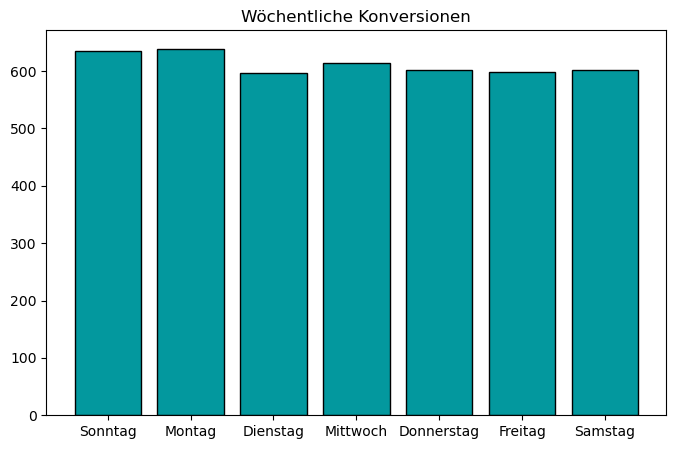

In [413]:
plt.figure(figsize=(8,5))
plt.title('Wöchentliche Konversionen')
weekly_conversion = df.groupby('week')[['Instagram Ad Conversions']].sum()
week_names= ['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag']
plt.bar(week_names, weekly_conversion['Instagram Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

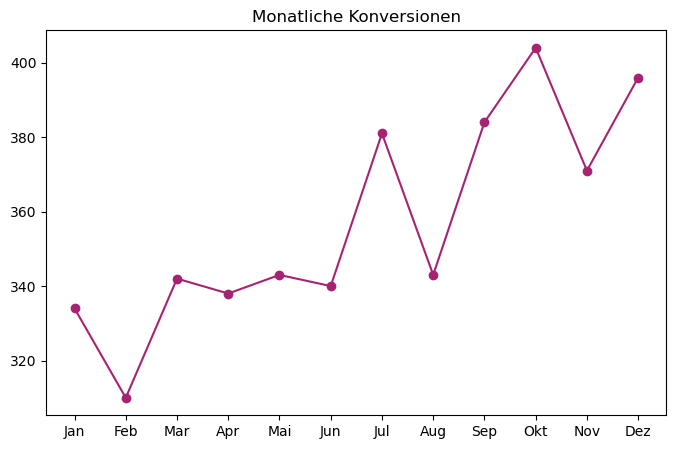

In [414]:
plt.figure(figsize=(8,5))
plt.title('Monatliche Konversionen')
monthly_conversion = df.groupby('month')[['Instagram Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez']
plt.plot(month_names, monthly_conversion['Instagram Ad Conversions'],'-o', color = '#A62372')
plt.show()

### Beobachtungen:
- Über die Wochentage hinweg bleibt die Gesamtzahl der Konversionen relativ konsistent, was auf ein gleichbleibendes Engagement-Niveau über die gesamte Woche hinweg hindeutet. Allerdings weisen Sonntage und Montage durchgängig die höchsten Konversionsraten im Vergleich zu anderen Tagen auf. Dies deutet darauf hin, dass der Beginn der Arbeitswoche ein erhöhtes Nutzerengagement oder eine stärkere Reaktion auf die Marketingbemühungen verzeichnet.

- Die Untersuchung des monatlichen Trends bei den Konversionen zeigt eine generell aufsteigende Entwicklung (Upward Trajectory), was auf einen allgemeinen Anstieg der Konversionen im Laufe der Zeit hindeutet. Bestimmte Monate stechen jedoch mit Schwankungen in den Konversionsraten hervor. Februar, April, Mai, Juni, August und November verzeichnen einen Rückgang der Konversionen im Vergleich zu den angrenzenden Monaten. Diese Perioden mit verringerten Konversionsraten könnten durch Faktoren wie saisonale Schwankungen, Veränderungen im Verbraucherverhalten oder Anpassungen der Marketingstrategien beeinflusst werden.

### Wie verhalten sich die Kosten pro Konversion (CPA) im Trend über die Zeit?

Kosten pro Konversion (Cost Per Conversion, CPC): Diese Kennzahl wird verwendet, um die Kosteneffizienz und Rentabilität einer Online-Werbekampagne zu bewerten. Diese Metrik hilft Marketern zu verstehen, wie viel sie ausgeben, um jede einzelne Konversion zu erzielen. Dies ermöglicht ihnen, ihre Ausgaben- und Targeting-Strategien effektiv zu optimieren.

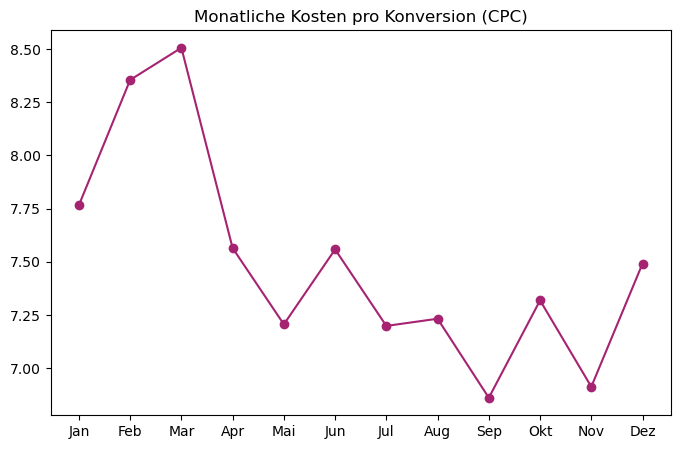

In [415]:
plt.figure(figsize=(8,5))
plt.title('Monatliche Kosten pro Konversion (CPC)')
monthly_df = df.groupby('month')[['Instagram Ad Conversions','Cost per Instagram Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Instagram Ad']/monthly_df['Instagram Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

### Beobachtungen:
- Der CPC-Trend über den 12-Monats-Zeitraum weist einige Schwankungen auf.

- September und November weisen die niedrigsten CPC-Werte auf, was auf potenziell kostengünstigere Werbung oder höhere Konversionsraten während dieser Perioden hindeutet.

- Der März hat den höchsten CPC-Wert, was darauf schließen lässt, dass die Werbekosten in diesem Monat im Vergleich zu anderen relativ höher sein könnten.

- Niedrigere CPC-Werte in bestimmten Monaten (z. B. September und November) könnten auf Perioden höherer Werbewirksamkeit oder günstigerer Marktbedingungen hindeuten.

### Empfehlung für unsere Kunden:
- In Betracht ziehen, mehr Werbebudget in Monate mit historisch niedrigeren CPC-Werten (z. B. September und November) zu verlagern, um den ROI (Return on Investment) zu maximieren.


### Gibt es eine langfristige Gleichgewichtsbeziehung (Equilibrium Relationship) zwischen den Werbeausgaben und den Konversionsraten, die einen stabilen, proportionalen Einfluss von Budgetänderungen auf die Konversionen im Zeitverlauf nahelegt?

- Wir führen einen Kointegrationstest durch.
- Zweck: Der Test untersucht, ob zwei oder mehr nicht-stationäre Zeitreihen langfristig miteinander verbunden sind, d. h. ob sie sich im Laufe der Zeit gemeinsam entwickeln und eine stabile Gleichgewichtsbeziehung zueinander haben.

In [416]:
score, p_value, _ = coint(df['Cost per Instagram Ad'], df['Instagram Ad Conversions'])
print('Cointegration Testwert:', score)
print('P-Wert:', p_value)
if p_value < 0.05:
    print("\nP-Wert ist geringer als Signifikanzwert, Nullhypothese wird abgelehnt.")
else:
    print("\nP-Wert ist größer als Signifikanzwert, Nullhypothese wird angenommen.")

Cointegration Testwert: -14.755428385103219
P-Wert: 2.1337375979061323e-26

P-Wert ist geringer als Signifikanzwert, Nullhypothese wird abgelehnt.


### Beobachtungen:
- Da der p-Wert signifikant niedriger als das gewählte Signifikanzniveau ist, verwerfen wir die Nullhypothese (H0). Dies deutet darauf hin, dass es eine langfristige Gleichgewichtsbeziehung (Equilibrium Relationship) zwischen den Werbeausgaben (Kosten) und den Konversionen gibt.

- Unternehmen können dieses Verständnis der stabilen Beziehung zwischen Kosten und Konversionen nutzen, um ihre Werbestrategien zu optimieren. Indem sie in Kampagnen investieren, die einen starken Return on Investment (ROI) aufweisen, und ihre Ausgaben basierend auf der Performance anpassen, können Konversionen maximiert und gleichzeitig Kosten verringert werden.



### Die Aufgabe ist abgeschlossen!